In [15]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA 

In [62]:
df = pd.read_csv("housing.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [63]:
df.isnull().sum() 
df=df.drop("ocean_proximity",axis=1)
df["total_bedrooms"]=df["total_bedrooms"].replace(np.nan,np.mean(df["total_bedrooms"])) 
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

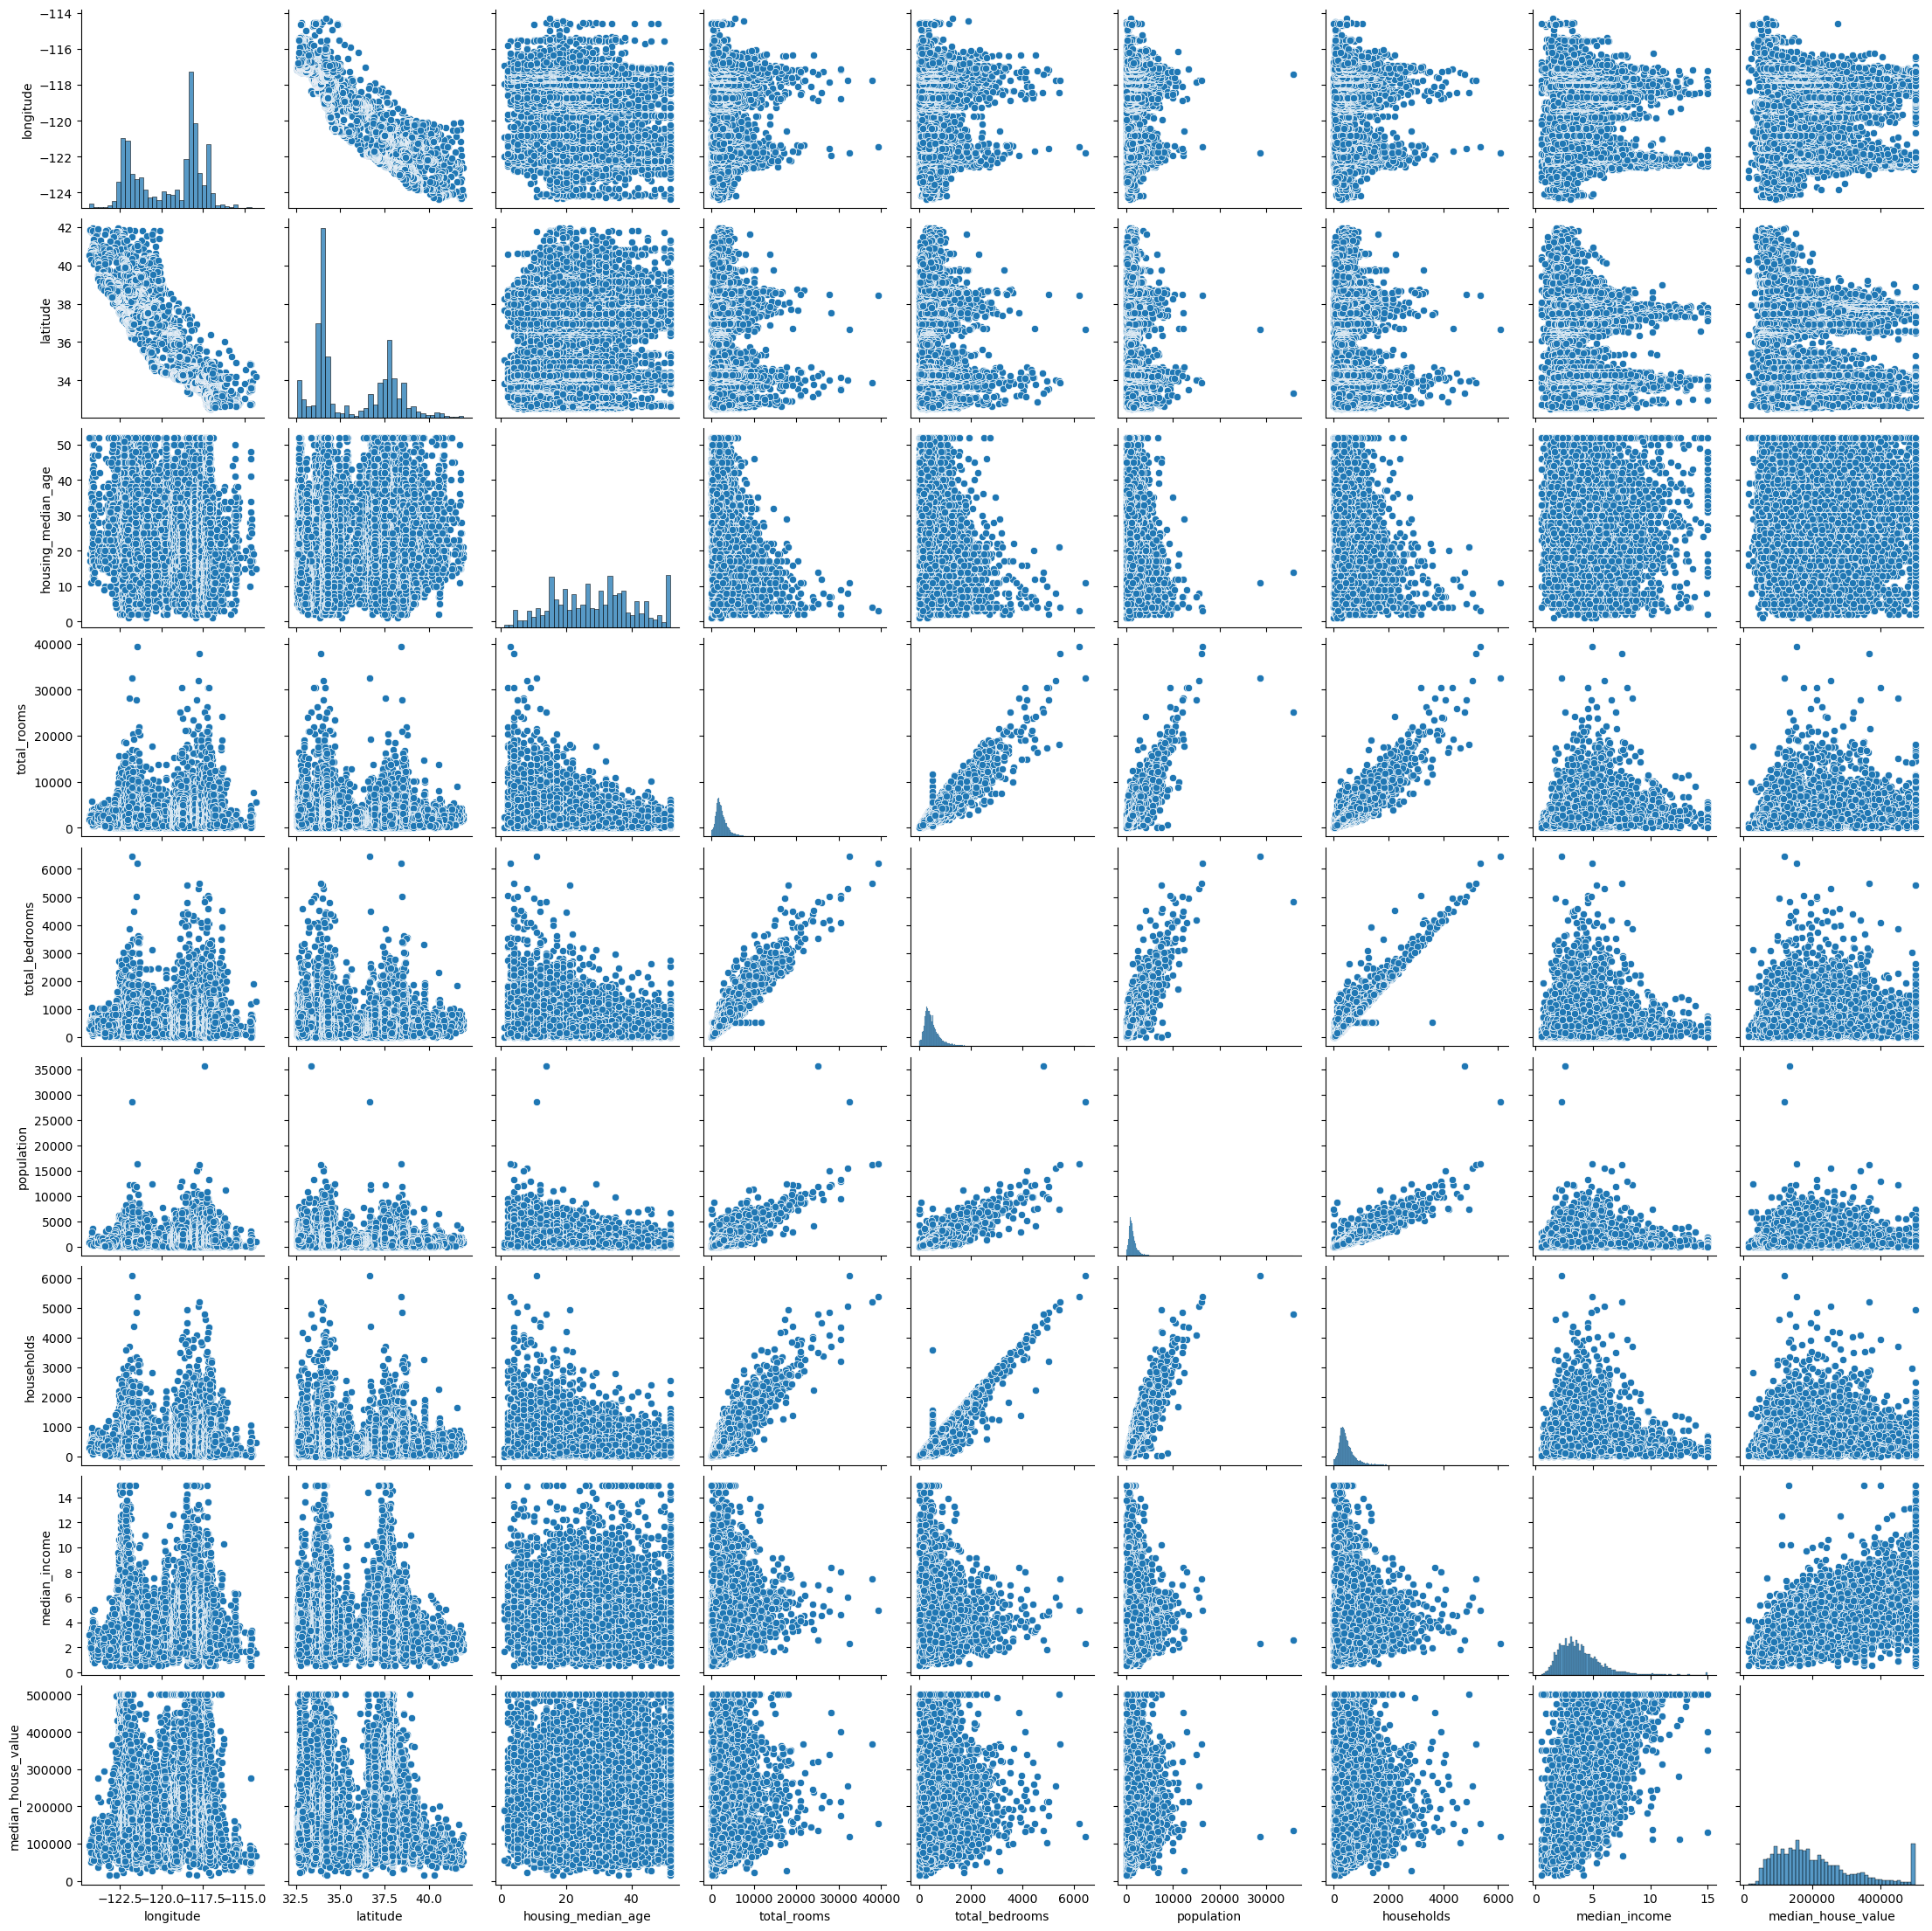

In [14]:
sb.pairplot(df)

In [102]:
df["bias"]=1
X = df.drop("median_house_value",axis=1).values 
Y = df["median_house_value"].values.reshape(-1,1) 

ss = StandardScaler() 

X = ss.fit_transform(X) 
Y = ss.fit_transform(Y)

print(X.shape,Y.shape)

(20640, 9) (20640, 1)


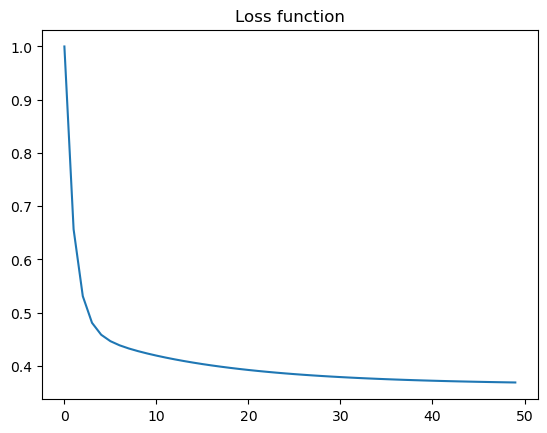

In [127]:
class LinearReggression: 
    def __init__(self,learningRate=0.001,iterationCount=50): 
        self.learningRate = learningRate 
        self.iterationCount = iterationCount 
    def fit_transform(self,X,Y): 
        self.n,self.d = X.shape 
        self.weights = np.zeros((self.d,1)) 
        self.loss=[]
        for it in range(self.iterationCount): 
            Y_predict = X @ self.weights 
            # print(Y_predict.shape)
            delY = Y_predict - Y 
            self.loss.append(sum([it*it for it in delY])[0]/self.n)
            # print(delY.shape)
            gradient = X.T @ delY 
            # print(gradient) 
            self.weights = self.weights - 2*(self.learningRate)*gradient 
            # print(self.weights.shape) 
            # print("#########")
    def lossPlot(self): 
        sb.lineplot(self.loss) 
        plt.title("Loss function") 
        plt.show()
    def predict(self,x): 
        # print(x.shape,self.weights.shape)
        return (self.weights.T @ x)[0] 
        
lr = LinearReggression(learningRate=0.00001) 
# lr.fit_transform(X[0:10,:],Y)
lr.fit_transform(X,Y)
lr.lossPlot()

In [124]:

for i in range(len(df)): 
    y_true = Y[i][0]
    y_predict = lr.predict(X[i]) 
    print(y_true,y_predict)

2.129631481668038 1.7563393125811346
1.314156136924335 1.8576922344772744
1.2586934142212565 1.494308733446288
1.1651000696598113 0.9877524039835164
1.1728995150399317 0.3971095260927665
0.5446108594191194 0.465671292517407
0.8002593468786223 0.4295091400752923
0.2993616324664436 0.41701842398473055
0.17197069125780987 -0.08237141616109134
0.47008282578685745 0.5167952031645552
0.6468702544029206 0.23268489561816597
0.302828052635386 0.43436734332737514
0.05757882568271023 0.1820495117237111
-0.13480749369359374 0.005696542428464069
-0.41298771225122244 -0.05346340386046089
-0.5793758803604583 -0.22797736917578248
-0.47105025008100787 0.030079732277047078
-0.44505209881393976 -0.1588445888741209
-0.41732073746240045 -0.21012947177501795
-0.3809233256885051 -0.03699678240008386
-0.514380502192788 -0.6137316864419331
-0.4077880819978088 -0.42984948996389305
-0.8055597963839508 -0.197599814438832
-0.9286177123814064 -0.18809052666733217
-0.6435046534858929 0.012131054792721141
-0.86102251

In [ ]:
""" 

loss = (y_true-y_predict)**2 = (y_true - w*x)**2
gradient w.r.t w= 2(y_true-y_predict)*(-x) = 2(y_predict-y_true)*x

"""